# Feature Engineering, Decision Tree Pruning and Hyperparameter Tuning

### The Data
We will be using the datasets <em>energia_*.csv</em> and <em>meteo_*.csv</em>. 

The first one contains 2256 cases and 6 features, including:

- Data
- Hora
- Normal (kWh)
- Horario Economico (kWh)
- Autoconsumo (kWh)
- Injecao na rede (kWh)
 
And the second one contains also 2256 cases but instead 15 features, including:

- dt
- dt_iso
- city_name 
- temp
- feels_like
- temp_min
- temp_max
- pressure
- sea_level
- grnd_level
- humidity
- wind_speed
- rain_1h
- clouds_all
- weather_description

## Import Libraries

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [263]:
energy_1 = pd.read_csv('energia_202109-202112.csv')
energy_2 = pd.read_csv('energia_202201-202212.csv')
energy_test = pd.read_csv('energia_202301-202304.csv')

meteo_1 = pd.read_csv('meteo_202109-202112.csv')
meteo_2 = pd.read_csv('meteo_202201-202212.csv')
meteo_test = pd.read_csv('meteo_202301-202304.csv')

In [264]:
energy_1.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injecao na rede (kWh)'],
      dtype='object')

In [265]:
energy_1.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


In [266]:
energy_2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01,0,0.0,0.486,0.0,NaN
1,2022-01-01,1,0.0,0.429,0.0,NaN
2,2022-01-01,2,0.0,0.463,0.0,NaN
3,2022-01-01,3,0.0,0.545,0.0,NaN
4,2022-01-01,4,0.0,0.439,0.0,NaN


In [267]:
energy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [268]:
meteo_1.columns

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')

In [269]:
meteo_1.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [270]:
meteo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

# Handling missing data and possible data transformations
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

## 1. Missing Values

<Axes: >

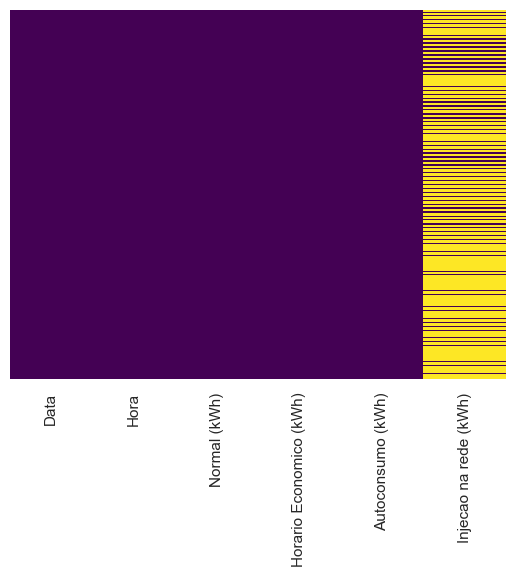

In [271]:
sns.heatmap(energy_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

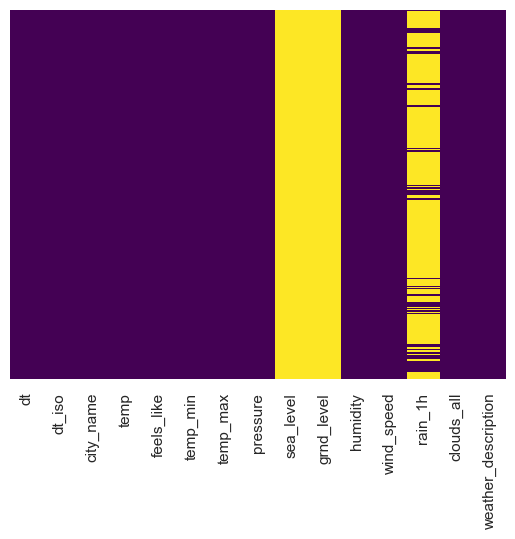

In [272]:
sns.heatmap(meteo_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [273]:
energy_1.isnull().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
Injecao na rede (kWh)      1690
dtype: int64

In [274]:
meteo_1.isnull().sum()

dt                        0
dt_iso                    0
city_name                 0
temp                      0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              2928
grnd_level             2928
humidity                  0
wind_speed                0
rain_1h                2391
clouds_all                0
weather_description       0
dtype: int64

### Drop or fill
Let's verify how the data is presented in the feature <em>Injecao na rede</em>

In [275]:
energy_1['Injecao na rede (kWh)'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Injecao na rede (kWh), dtype: object

In [276]:
energy_1[energy_1['Injecao na rede (kWh)'].isnull()]

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.000,0.000,0.0,NaN
1,2021-09-29,1,0.000,0.000,0.0,NaN
2,2021-09-29,2,0.000,0.000,0.0,NaN
3,2021-09-29,3,0.000,0.000,0.0,NaN
4,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...
2251,2021-12-31,19,2.176,0.000,0.0,NaN
2252,2021-12-31,20,0.732,0.000,0.0,NaN
2253,2021-12-31,21,0.704,0.000,0.0,NaN
2254,2021-12-31,22,0.000,0.424,0.0,NaN


Copy of the data to experiment the options

In [277]:
energy_1_m1 = energy_1.copy()
energy_1_m2 = energy_1.copy()

#### a) Drop

In [278]:
energy_1_m1.drop(['Injecao na rede (kWh)'], axis=1, inplace=True)
energy_1_m1.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,2021-09-29,0,0.0,0.0,0.0
1,2021-09-29,1,0.0,0.0,0.0
2,2021-09-29,2,0.0,0.0,0.0
3,2021-09-29,3,0.0,0.0,0.0
4,2021-09-29,4,0.0,0.0,0.0


#### b) Fill with zero

In [279]:
energy_1_m2.fillna(0, inplace=True)
energy_1_m2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


We need to choose one of the options to keep going. We will choose to fill the column since it brings added value to our goal.

In [280]:
energy_1_copy = energy_1.fillna(0)
energy_1_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


Let's see if there are still missing values for energy

<Axes: >

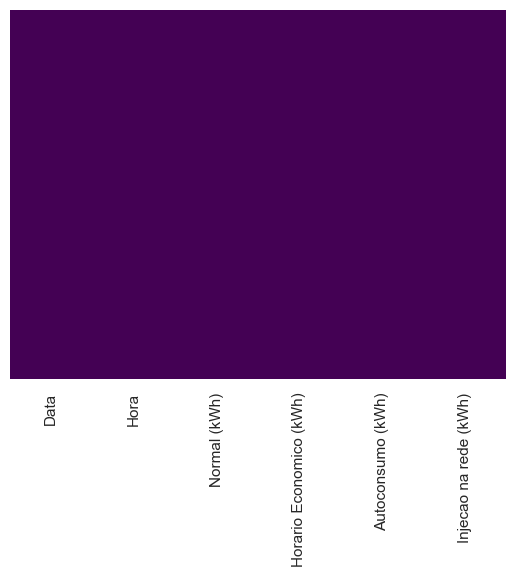

In [281]:
sns.heatmap(energy_1_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [282]:
energy_1_copy.isnull().sum()

Data                       0
Hora                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dtype: int64

In [283]:
energy_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horario Economico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injecao na rede (kWh)    2256 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB


In [284]:
energy_1_copy.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


Let's now verify how the data is presented in the features <em>sea_level</em>, <em>grnd_level</em> and <em>rain_1h</em>

In [285]:
meteo_1['sea_level'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: sea_level, dtype: float64

In [286]:
meteo_1['grnd_level'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: grnd_level, dtype: float64

In [287]:
meteo_1['rain_1h'].head()

0     NaN
1     NaN
2     NaN
3    0.14
4    1.26
Name: rain_1h, dtype: float64

Now we need to choose one of the options to keep going. We will choose to drop both the <em>sea_level</em> and <em>grnd_level</em> since they don't bring any value to our model and fill the column with the feature <em>rain_1h</em> since it brings added value to our goal.

In [288]:
meteo_1_copy = meteo_1.drop(['sea_level', 'grnd_level'], axis=1, inplace=False)
meteo_1_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


In [289]:
meteo_1_copy.fillna(0, inplace=True)
meteo_1_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Let's see if there are still missing values for meteo

<Axes: >

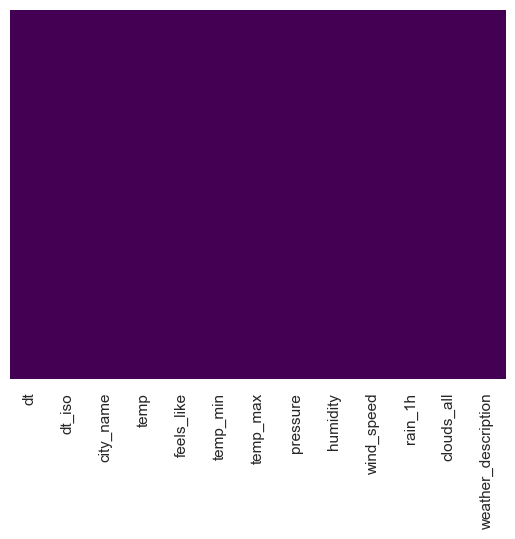

In [290]:
sns.heatmap(meteo_1_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [291]:
meteo_1_copy.isnull().sum()

dt                     0
dt_iso                 0
city_name              0
temp                   0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
rain_1h                0
clouds_all             0
weather_description    0
dtype: int64

In [292]:
meteo_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   humidity             2928 non-null   int64  
 9   wind_speed           2928 non-null   float64
 10  rain_1h              2928 non-null   float64
 11  clouds_all           2928 non-null   int64  
 12  weather_description  2928 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 297.5+ KB


In [293]:
meteo_1_copy.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


There are features that are of the type <em>object</em>: <em>Data</em> and <em>Injecao na rede (kWh)</em>.

Let's see how many different values each feature has.

In [294]:
energy_1_copy.nunique()

Data                        94
Hora                        24
Normal (kWh)               772
Horario Economico (kWh)    329
Autoconsumo (kWh)          440
Injecao na rede (kWh)        5
dtype: int64

In [295]:
energy_1_copy['Injecao na rede (kWh)'].nunique()

5

In [296]:
energy_1_copy['Injecao na rede (kWh)'].describe()

count     2256
unique       5
top          0
freq      1690
Name: Injecao na rede (kWh), dtype: int64

There are features that are of the type <em>object</em>: <em>dt_iso</em>, <em>city_name </em> and <em>weather_description</em>.

Let's see how many different values each feature has.

In [297]:
meteo_1_copy.nunique()

dt                     2928
dt_iso                 2928
city_name                 1
temp                   1279
feels_like             1476
temp_min                262
temp_max                256
pressure                 35
humidity                 70
wind_speed              569
rain_1h                 174
clouds_all              101
weather_description       8
dtype: int64

## 2. Handling categoric data

Feature <em>city_name</em>

In [298]:
meteo_1_copy['city_name'].head()

0    local
1    local
2    local
3    local
4    local
Name: city_name, dtype: object

The unique value of <em>city_name</em> is <em>Guimarães</em>. We can drop this feature as well.

In [299]:
meteo_1_copy.drop(['city_name'], axis=1, inplace=True)
meteo_1_copy.dropna(inplace=True)

In [300]:
meteo_1_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Let's see the feature <em>weather_description</em>:

In [301]:
meteo_1_copy['weather_description'].value_counts()

weather_description
sky is clear            795
overcast clouds         667
light rain              412
broken clouds           402
scattered clouds        324
few clouds              203
moderate rain           110
heavy intensity rain     15
Name: count, dtype: int64

In [302]:
meteo_1_copy['weather_description'].value_counts().count()

8

Let's create a barplot of <em>Frequency Distribution of Weather Discription</em> (style="darkgrid", fontsize=12)

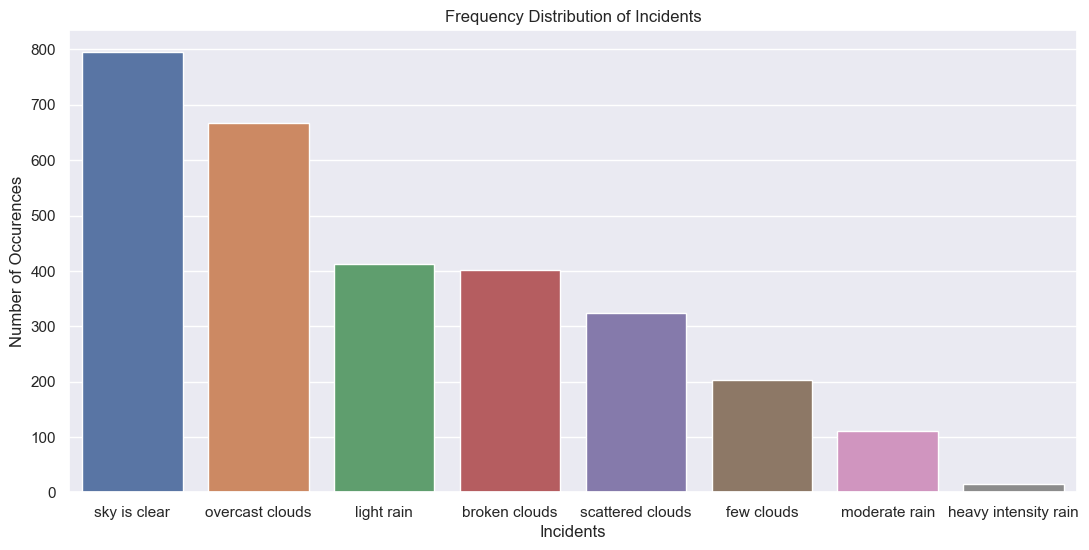

In [303]:
weather_discription_count = meteo_1_copy['weather_description'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(13, 6))
sns.barplot(x=weather_discription_count.index, y=weather_discription_count.values)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Incidents', fontsize=12)
plt.show()

Let's create a pie plot of <em>Category Distribution of Weather Discription</em>

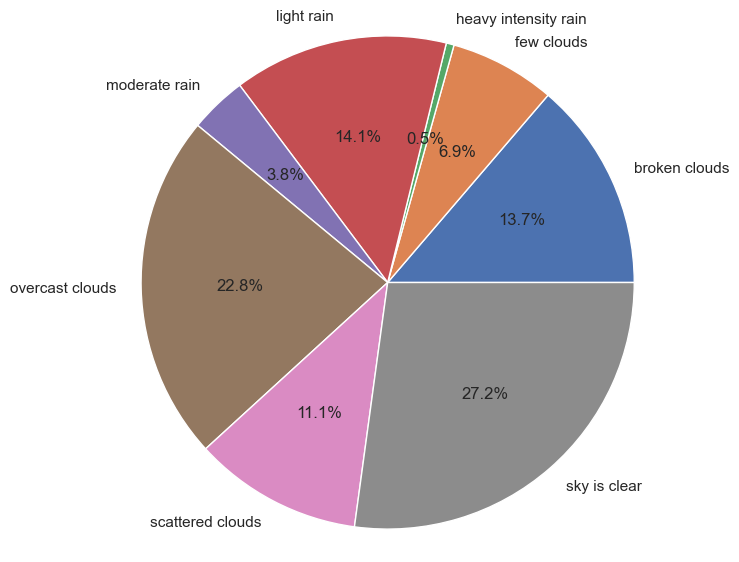

In [304]:
labels = meteo_1_copy['weather_description'].astype('category').cat.categories.tolist()
counts = meteo_1_copy['weather_description'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.show()

We have several options how to deal with qualitative data:

#### a) Replace Values

Again, we are using data copies to experiment all options.

In [305]:
meteo_1_copy_r1=meteo_1_copy.copy()
meteo_1_copy_r1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


We need to create a dictionary assigning the string to a numeric value:

sky is clear - 0, overcast clouds - 1, light rain - 2, broken clouds - 3, scattered clouds - 4, few clouds - 5, moderate rain - 6, heavy intensity rain - 7

In [306]:
replace_map = {'weather_description': {'sky is clear': 0, 'overcast clouds': 1, 'light rain': 2, 'broken clouds': 3, 'scattered clouds': 4, 'few clouds': 5, 'moderate rain': 6, 'heavy intensity rain': 7}}
print(replace_map)

{'weather_description': {'sky is clear': 0, 'overcast clouds': 1, 'light rain': 2, 'broken clouds': 3, 'scattered clouds': 4, 'few clouds': 5, 'moderate rain': 6, 'heavy intensity rain': 7}}


We can create a replacement map in other way:

In [307]:
labels = meteo_1_copy_r1['weather_description'].astype('category').cat.categories.tolist()
replace_map_comp = {'weather_description' : {k:v for k,v in zip(labels, list(range(0,len(labels)+1)))}}
print(replace_map_comp)

{'weather_description': {'broken clouds': 0, 'few clouds': 1, 'heavy intensity rain': 2, 'light rain': 3, 'moderate rain': 4, 'overcast clouds': 5, 'scattered clouds': 6, 'sky is clear': 7}}


In [308]:
meteo_1_copy_r1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


Now we need to replace with the new values:

In [309]:
meteo_1_copy_r1.replace(replace_map_comp,inplace=True)
meteo_1_copy_r1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,5
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,5
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


Done! Now we can see that the type of values are <em>int64</em>:

In [310]:
print(meteo_1_copy_r1['weather_description'].dtypes)

int64


#### b) Label encoding

In [311]:
meteo_1_copy_r2=meteo_1_copy.copy()
meteo_1_copy_r2.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain


In [312]:
print(meteo_1_copy_r2.dtypes)

dt                       int64
dt_iso                  object
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
rain_1h                float64
clouds_all               int64
weather_description     object
dtype: object


Similar to the previous examples, each string will be assigned a number. Instead of replacing the values under the column <em>incidents</em>, we are going to create a new colum to each created label.

In [313]:
meteo_1_copy_r2['None'] = np.where(meteo_1_copy_r2['weather_description'].str.contains('None'), 1, 0)
meteo_1_copy_r2.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,None
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds,0
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds,0
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,0
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,0


To complete the process, it is needed to replicate for each label and then drop the column <em>weather_description</em>.

Let's see another way to label encoding. This uses the <em>LabelEncoder</em> from <em>sklearn</em>.

In [314]:
meteo_1_copy_r2_sk1 = meteo_1_copy.copy()
meteo_1_copy_r2_r22=meteo_1_copy.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
meteo_1_copy_r2_sk1['weather_description_code'] = lb_make.fit_transform(meteo_1_copy_r2_r22['weather_description'])

meteo_1_copy_r2_sk1.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,weather_description_code
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds,5
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds,5
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,4


It creates a new column, <em>weather_description_code</em>, with the labels assigned to feature <em>weather_description</em>. The numeric values were assigned randomly, being the crescent order not apllicable to the meaning of the qualifying words.

#### c) One-Hot encoding

This alternative uses <em>LabelBinarizer</em> of <em>sklearn</em> and creates a matrix with bits regarding each label.

In [315]:
meteo_1_copy_r3 = meteo_1_copy.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(meteo_1_copy_r3['weather_description'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [316]:
result_df = pd.concat([meteo_1_copy_r3, lb_results_df], axis=1)
result_df.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,broken clouds,1,0,0,0,0,0,0,0
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,overcast clouds,0,0,0,0,0,1,0,0
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,overcast clouds,0,0,0,0,0,1,0,0
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain,0,0,0,1,0,0,0,0
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain,0,0,0,0,1,0,0,0


#### d) Binary Encoding
Similar to the previous technique, it creates a matrix of the status of the values, but this time with binary values. See the comparison between techniques below:

|   Level   | "Decimal encoding" | Binary encoding | One-Hot encoding |
| :-------: | :----------------: | :-------------: | :--------------: |
| None      |         0          |       000       |      000001      |
| Low       |         1          |       001       |      000010      |
| Medium    |         2          |       010       |      000100      |
| High      |         3          |       011       |      001000      |
| Very_High |         4          |       100       |      010000      |

For this technique it is needed to have the <em>category_encoders</em> installed:
<code>!pip install category_encoders</code>

In [317]:
meteo_1_copy_r4 = meteo_1_copy.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['weather_description'])
df_binary = encoder.fit_transform(meteo_1_copy_r4)

df_binary.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description_0,weather_description_1,weather_description_2,weather_description_3
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,0,0,0,1
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,0,0,1,0
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,0,0,1,0
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,0,0,1,1
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,0,1,0,0


#### e) Backward difference encoding
The values are normalized in the range of -1 to 1.

In [318]:
meteo_1_copy_r5 = meteo_1_copy.copy()

encoder = ce.BackwardDifferenceEncoder(cols=['weather_description'])
df_bd = encoder.fit_transform(meteo_1_copy_r5)

df_bd.head()

C:\Users\nseip\miniconda3\envs\aula1\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
C:\Users\nseip\miniconda3\envs\aula1\lib\site-packages\category_encoders\base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description_0,weather_description_1,weather_description_2,weather_description_3,weather_description_4,weather_description_5,weather_description_6
0,1,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125
1,1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,0.125,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125
2,1,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,0.125,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125
3,1,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,0.125,0.25,-0.625,-0.5,-0.375,-0.25,-0.125
4,1,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,0.125,0.25,0.375,-0.5,-0.375,-0.25,-0.125


#### f) Factorize
This technique encodes the object as an enumerated type or categorical variable.

In [319]:
meteo_1_copy_r6 = meteo_1_copy.copy()

In [320]:
meteo_1_copy_r6['weather_description'] = pd.factorize(meteo_1_copy_r6['weather_description'])[0] + 1
meteo_1_copy_r6.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


We will choose the factorize technique to keep going.

In [321]:
meteo_1_copy['weather_description'] = pd.factorize(meteo_1_copy['weather_description'])[0] + 1
meteo_1_copy.head()

,dt,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1
1,1630458000,2021-09-01 01:00:00 +0000 UTC,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2
2,1630461600,2021-09-01 02:00:00 +0000 UTC,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2
3,1630465200,2021-09-01 03:00:00 +0000 UTC,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3
4,1630468800,2021-09-01 04:00:00 +0000 UTC,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4


Other option would it be to filter the <em>NaN</em> values when reading the CSV file:

<code>data = pd.read_csv('incidents.csv', na_filter=False)</code>

Since there are no more categoric columns we will resume with the file like it is.

## 3. Handling dates

Datetime Properties and Methods (https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties)

In [322]:
energy_1_copy_dt = energy_1_copy.copy()

In [323]:
energy_1_copy_dt['Data'].head()

0    2021-09-29
1    2021-09-29
2    2021-09-29
3    2021-09-29
4    2021-09-29
Name: Data, dtype: object

We are going to convert the dates from <em>object</em> to <em>datetime</em>, specifying the format we want:

In [324]:
energy_1_copy_dt['Data'] = pd.to_datetime(energy_1_copy_dt['Data'], format='%Y-%m-%d', errors='coerce')

In [325]:
assert energy_1_copy_dt['Data'].isnull().sum()==0, 'missing record date'

In [326]:
energy_1_copy_dt['Data'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: Data, dtype: datetime64[ns]

We can extract parts of the date and create new columns with that:

In [327]:
energy_1_copy_dt['Data_year'] = energy_1_copy_dt['Data'].dt.year
energy_1_copy_dt['Data_month'] = energy_1_copy_dt['Data'].dt.month
energy_1_copy_dt['Data_day'] = energy_1_copy_dt['Data'].dt.day

In [328]:
energy_1_copy_dt.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_year,Data_month,Data_day
0,2021-09-29,0,0.0,0.0,0.0,0,2021,9,29
1,2021-09-29,1,0.0,0.0,0.0,0,2021,9,29
2,2021-09-29,2,0.0,0.0,0.0,0,2021,9,29
3,2021-09-29,3,0.0,0.0,0.0,0,2021,9,29
4,2021-09-29,4,0.0,0.0,0.0,0,2021,9,29


In [329]:
energy_1_copy_dt.nunique()

Data                        94
Hora                        24
Normal (kWh)               772
Horario Economico (kWh)    329
Autoconsumo (kWh)          440
Injecao na rede (kWh)        5
Data_year                    1
Data_month                   4
Data_day                    31
dtype: int64

Since the year has only one value, we will drop it.

In [330]:
energy_1_copy_dt.drop('Data_year', axis=1, inplace=True)
energy_1_copy_dt.dropna(inplace=True)

In [331]:
energy_1_copy_dt.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),Data_month,Data_day
0,2021-09-29,0,0.0,0.0,0.0,0,9,29
1,2021-09-29,1,0.0,0.0,0.0,0,9,29
2,2021-09-29,2,0.0,0.0,0.0,0,9,29
3,2021-09-29,3,0.0,0.0,0.0,0,9,29
4,2021-09-29,4,0.0,0.0,0.0,0,9,29


Other functions to deal with dates

In [332]:
energy_1_copy_dt2 = energy_1_copy.copy()

In [333]:
energy_1_copy_dt2['Data'] = pd.to_datetime(energy_1_copy_dt2['Data'])
energy_1_copy_dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Hora                     2256 non-null   int64         
 2   Normal (kWh)             2256 non-null   float64       
 3   Horario Economico (kWh)  2256 non-null   float64       
 4   Autoconsumo (kWh)        2256 non-null   float64       
 5   Injecao na rede (kWh)    2256 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 105.9+ KB


In [334]:
energy_1_copy_dt2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,0
1,2021-09-29,1,0.0,0.0,0.0,0
2,2021-09-29,2,0.0,0.0,0.0,0
3,2021-09-29,3,0.0,0.0,0.0,0
4,2021-09-29,4,0.0,0.0,0.0,0


We can use <em>datetime.today</em> and fetch the actual date.

In [335]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2023, 11, 14, 22, 17, 29, 709893)

It can be measured the time elapsed between the dates on the dataset and today.

In [336]:
today - energy_1_copy_dt2['Data']

0      776 days 22:17:29.709893
1      776 days 22:17:29.709893
2      776 days 22:17:29.709893
3      776 days 22:17:29.709893
4      776 days 22:17:29.709893
                 ...           
2251   683 days 22:17:29.709893
2252   683 days 22:17:29.709893
2253   683 days 22:17:29.709893
2254   683 days 22:17:29.709893
2255   683 days 22:17:29.709893
Name: Data, Length: 2256, dtype: timedelta64[ns]

In [337]:
(today - energy_1_copy_dt2['Data']).dt.days

0       776
1       776
2       776
3       776
4       776
       ... 
2251    683
2252    683
2253    683
2254    683
2255    683
Name: Data, Length: 2256, dtype: int64

And we can also separate each component of the date by day, month, hour, time, etc.

In [338]:
energy_1_copy_dt2['day'] = energy_1_copy_dt2['Data'].dt.day
energy_1_copy_dt2['month'] = energy_1_copy_dt2['Data'].dt.month
energy_1_copy_dt2.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),day,month
0,2021-09-29,0,0.0,0.0,0.0,0,29,9
1,2021-09-29,1,0.0,0.0,0.0,0,29,9
2,2021-09-29,2,0.0,0.0,0.0,0,29,9
3,2021-09-29,3,0.0,0.0,0.0,0,29,9
4,2021-09-29,4,0.0,0.0,0.0,0,29,9


Now we need to choose how to deal with the <em>Data</em>.

In [354]:
energy_1_copy['Data'] = pd.to_datetime(energy_1_copy['Data'], format='%Y-%m-%d', errors='coerce')
energy_1_copy['Data_year'] = energy_1_copy['Data'].dt.year
energy_1_copy['Data_month'] = energy_1_copy['Data'].dt.month
energy_1_copy['Data_day'] = energy_1_copy['Data'].dt.day

In [355]:
energy_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Hora                     2256 non-null   int64         
 2   Normal (kWh)             2256 non-null   float64       
 3   Horario Economico (kWh)  2256 non-null   float64       
 4   Autoconsumo (kWh)        2256 non-null   float64       
 5   Injecao na rede (kWh)    2256 non-null   object        
 6   Data_year                2256 non-null   int32         
 7   Data_month               2256 non-null   int32         
 8   Data_day                 2256 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(1)
memory usage: 132.3+ KB


In [356]:
meteo_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               2928 non-null   datetime64[ns]
 1   temp                 2928 non-null   float64       
 2   feels_like           2928 non-null   float64       
 3   temp_min             2928 non-null   float64       
 4   temp_max             2928 non-null   float64       
 5   pressure             2928 non-null   int64         
 6   humidity             2928 non-null   int64         
 7   wind_speed           2928 non-null   float64       
 8   rain_1h              2928 non-null   float64       
 9   clouds_all           2928 non-null   int64         
 10  weather_description  2928 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 251.8 KB


Now we need to do the same process but for the meteo dataset for the <em>dt</em> and <em>dt_iso</em> columns.

In [357]:
meteo_1_copy['dt_iso'].head()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

Since all dates have <em>+0000</em> and <em>UTC</em>, we don't need them.

In [358]:
meteo_1_copy['dt_iso'].replace(to_replace=r' \+0000 UTC', value='', regex=True, inplace=True)
meteo_1_copy['dt_iso'].head()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

In [359]:
meteo_1_copy['dt_iso'] = pd.to_datetime(meteo_1_copy['dt_iso'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
assert meteo_1_copy['dt_iso'].isnull().sum()==0, 'missing record date'
meteo_1_copy['dt_iso'].head()

0   2021-09-01 00:00:00
1   2021-09-01 01:00:00
2   2021-09-01 02:00:00
3   2021-09-01 03:00:00
4   2021-09-01 04:00:00
Name: dt_iso, dtype: datetime64[ns]

Since <em>dt</em> is just the same date as <em>dt_iso</em> but as a timestamp, we can remove it.

In [360]:
meteo_1_copy.drop('dt', axis=1, inplace=True)
meteo_1_copy.dropna(inplace=True)
meteo_1_copy.head()

KeyError: "['dt'] not found in axis"

In [361]:
meteo_1_copy['dt_iso_year'] = meteo_1_copy['dt_iso'].dt.year
meteo_1_copy['dt_iso_month'] = meteo_1_copy['dt_iso'].dt.month
meteo_1_copy['dt_iso_day'] = meteo_1_copy['dt_iso'].dt.day
meteo_1_copy['dt_iso_hour'] = meteo_1_copy['dt_iso'].dt.hour
meteo_1_copy['dt_iso_minute'] = meteo_1_copy['dt_iso'].dt.minute
meteo_1_copy['dt_iso_second'] = meteo_1_copy['dt_iso'].dt.second

In [362]:
meteo_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               2928 non-null   datetime64[ns]
 1   temp                 2928 non-null   float64       
 2   feels_like           2928 non-null   float64       
 3   temp_min             2928 non-null   float64       
 4   temp_max             2928 non-null   float64       
 5   pressure             2928 non-null   int64         
 6   humidity             2928 non-null   int64         
 7   wind_speed           2928 non-null   float64       
 8   rain_1h              2928 non-null   float64       
 9   clouds_all           2928 non-null   int64         
 10  weather_description  2928 non-null   int64         
 11  dt_iso_year          2928 non-null   int32         
 12  dt_iso_month         2928 non-null   int32         
 13  dt_iso_day           2928 non-nul

In [364]:
meteo_1_copy.nunique()

dt_iso                 2928
temp                   1279
feels_like             1476
temp_min                262
temp_max                256
pressure                 35
humidity                 70
wind_speed              569
rain_1h                 174
clouds_all              101
weather_description       8
dt_iso_year               1
dt_iso_month              4
dt_iso_day               31
dt_iso_hour              24
dt_iso_minute             1
dt_iso_second             1
dtype: int64

Since the <em>dt_iso_year</em>, <em>dt_iso_minute</em> and <em>dt_iso_second</em> only have one value we can drop them.

In [365]:
meteo_1_copy.drop(['dt_iso_year'], axis=1, inplace=True)
meteo_1_copy.drop(['dt_iso_minute'], axis=1, inplace=True)
meteo_1_copy.drop(['dt_iso_second'], axis=1, inplace=True)
meteo_1_copy.head()

,dt_iso,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,dt_iso_month,dt_iso_day,dt_iso_hour
0,2021-09-01 00:00:00,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78,1,9,1,0
1,2021-09-01 01:00:00,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92,2,9,1,1
2,2021-09-01 02:00:00,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91,2,9,1,2
3,2021-09-01 03:00:00,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,3,9,1,3
4,2021-09-01 04:00:00,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,4,9,1,4


# Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

Let's analyze through a heatmap

We can see that there is a relation between 
- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

Let's see with a pairplot

It's hard to analyze the relation of all features. Let's create jointplots between the features with notice a relationship.

Jointplot of <em>Magnitude_of_delay vs. Delay_in_seconds</em>

Jointplot <em>Luminosity vs. Avg_temperature</em>

Jointplot <em>Avg_humidity vs. Delay_in_seconds</em>

Jointplot <em>Avg_temperature vs. Avg_humidity</em>

It seems there are a relation between <em>Avg_temperature</em> and <em>Avg_humidity</em>. Let´s create a lmplot <em>Avg_temperature vs. Avg_humidity</em>